In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path0 = './cell_images/Parasitized/'
path1 = './cell_images/Uninfected/'

para = os.listdir(path0)
unin = os.listdir(path1)

(148, 142, 3)

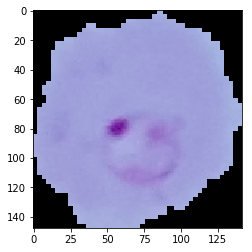

In [3]:
plt.imshow(cv2.imread(path0+para[0]))

img0 = cv2.imread(path0+para[0])
img0.shape

In [4]:
images = []
labels = []

for p in tqdm(para):
    try:
        img = cv2.imread(path0+p)
        img_re = cv2.resize(img,(60,60))
        images.append(np.array(img_re))
        labels.append(0)
    except AttributeError:
        print("")

100%|██████████████████████████████████████████████████████████████████████████▉| 13761/13780 [01:07<00:00, 198.63it/s]

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize


100%|██████████████████████████████████████████████████████████████████████████▉| 13761/13780 [01:20<00:00, 198.63it/s]

In [5]:
pd.Series(labels).value_counts()

0    13779
dtype: int64

(60, 60, 3)

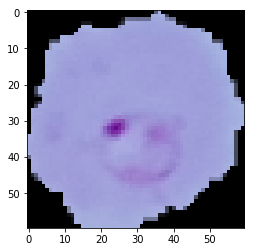

In [6]:
plt.imshow(images[0])

images[0].shape

In [7]:
    
for u in tqdm(unin):
        img = cv2.imread(path1+u)
        img_re = cv2.resize(img,(60,60))
        images.append(np.array(img_re))
        labels.append(1)


 22%|█████████████████                                                           | 3096/13780 [00:15<00:55, 193.49it/s]


 43%|████████████████████████████████▌                                           | 5906/13780 [00:31<00:53, 145.85it/s]


 65%|█████████████████████████████████████████████████▋                           | 8891/13780 [00:47<01:16, 64.29it/s]


 87%|█████████████████████████████████████████████████████████████████▍         | 12017/13780 [01:03<00:06, 258.67it/s]


100%|██████████████████████████████████████████████████████████████████████████▉| 13768/13780 [01:11<00:00, 250.77it/s]

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize



100%|██████████████████████████████████████████████████████████████████████████▉| 13768/13780 [01:30<00:00, 250.77it/s]

In [8]:
pd.Series(labels).value_counts()

1    13779
0    13779
dtype: int64

(60, 60, 3)

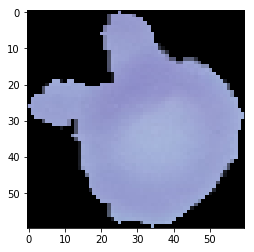

In [9]:
plt.imshow(images[13804])

images[13804].shape

In [10]:
print("images : "+str(len(images))+" Labels : "+str(len(labels)))

images : 27558 Labels : 27558


In [11]:
data = np.array(images)
data_label = np.array(labels)

In [12]:
data.shape

(27558, 60, 60, 3)

In [13]:
data = data/255.

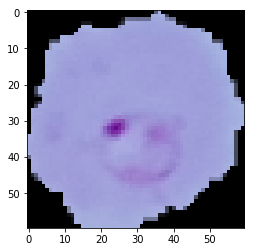

In [14]:
plt.imshow(data[0])

In [15]:
X_train, X_test , y_train , y_test = train_test_split(data,data_label, test_size=0.2, random_state = 42)
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train, test_size=0.2, random_state = 42)

In [16]:
print(str(len(X_train)) + " " + str(len(y_train)))
print(str(len(X_test)) + " " + str(len(y_test)))
print(str(len(X_val)) + " " + str(len(y_val)))

17636 17636
5512 5512
4410 4410


0


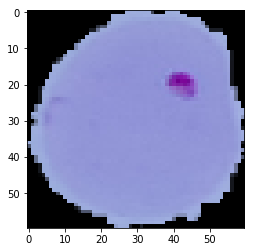

In [17]:
plt.imshow(X_test[0])
print(y_test[0])

In [18]:
X_train[0].shape

(60, 60, 3)

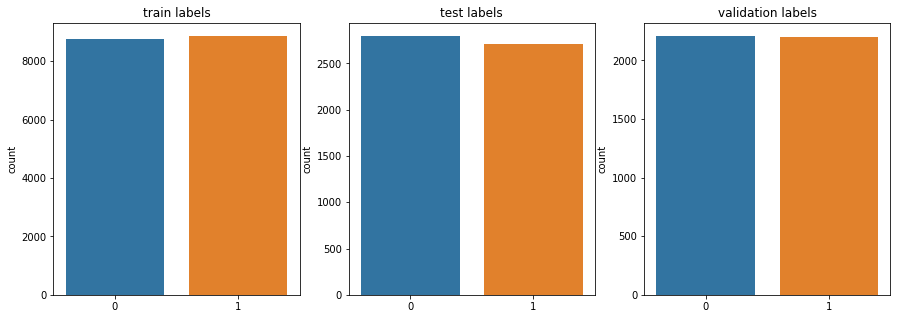

In [19]:
plt.figure(figsize=(15,5))
n=0
for i,j in zip([y_train,y_test, y_val] , ['train labels', 'test labels','validation labels']):
    n += 1
    plt.subplot(1, 3, n)
    sns.countplot(x=i)
    plt.title(j)
plt.show()

In [20]:
y_test[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [21]:
y_train[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [22]:
y_val[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

In [24]:
import tensorflow as tf

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Activation
from keras import optimizers
from keras.models import Sequential

In [28]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(60,60,3), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(60, 60, 3..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call 

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       73856     
__________

In [30]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, verbose=1 ,epochs=15)

Instructions for updating:
Use tf.cast instead.
Train on 17636 samples, validate on 4410 samples
Epoch 1/15


 6528/17636 [==========>...................] - ETA: 5:59:02 - loss: 0.6929 - acc: 0.62 - ETA: 3:00:09 - loss: 0.6977 - acc: 0.53 - ETA: 2:00:37 - loss: 0.6970 - acc: 0.51 - ETA: 1:30:39 - loss: 0.6958 - acc: 0.50 - ETA: 1:12:41 - loss: 0.6951 - acc: 0.51 - ETA: 1:00:42 - loss: 0.6951 - acc: 0.51 - ETA: 52:09 - loss: 0.6955 - acc: 0.4955 - ETA: 45:43 - loss: 0.6952 - acc: 0.50 - ETA: 40:44 - loss: 0.6952 - acc: 0.49 - ETA: 36:44 - loss: 0.6949 - acc: 0.50 - ETA: 33:28 - loss: 0.6948 - acc: 0.50 - ETA: 30:44 - loss: 0.6945 - acc: 0.51 - ETA: 28:26 - loss: 0.6943 - acc: 0.51 - ETA: 26:27 - loss: 0.6938 - acc: 0.52 - ETA: 24:45 - loss: 0.6939 - acc: 0.52 - ETA: 23:15 - loss: 0.6941 - acc: 0.51 - ETA: 21:55 - loss: 0.6939 - acc: 0.51 - ETA: 20:45 - loss: 0.6938 - acc: 0.50 - ETA: 19:41 - loss: 0.6934 - acc: 0.51 - ETA: 18:44 - loss: 0.6931 - acc: 0.51 - ETA: 17:53 - loss: 0.6928 - acc: 0.51 - ETA: 17:06 - loss: 0.6926 - acc: 0.51 - ETA: 16:23 - loss: 0.6922 - acc: 0.52 - ETA: 15:44 - loss: 

17636/17636 [==============================] - ETA: 35s - loss: 0.6623 - acc: 0.60 - ETA: 35s - loss: 0.6623 - acc: 0.60 - ETA: 34s - loss: 0.6620 - acc: 0.60 - ETA: 34s - loss: 0.6617 - acc: 0.60 - ETA: 34s - loss: 0.6613 - acc: 0.60 - ETA: 34s - loss: 0.6609 - acc: 0.60 - ETA: 33s - loss: 0.6609 - acc: 0.60 - ETA: 33s - loss: 0.6609 - acc: 0.60 - ETA: 33s - loss: 0.6608 - acc: 0.60 - ETA: 32s - loss: 0.6605 - acc: 0.60 - ETA: 32s - loss: 0.6604 - acc: 0.60 - ETA: 32s - loss: 0.6602 - acc: 0.60 - ETA: 32s - loss: 0.6603 - acc: 0.60 - ETA: 31s - loss: 0.6600 - acc: 0.60 - ETA: 31s - loss: 0.6596 - acc: 0.60 - ETA: 31s - loss: 0.6593 - acc: 0.60 - ETA: 30s - loss: 0.6593 - acc: 0.60 - ETA: 30s - loss: 0.6591 - acc: 0.60 - ETA: 30s - loss: 0.6589 - acc: 0.60 - ETA: 30s - loss: 0.6589 - acc: 0.60 - ETA: 29s - loss: 0.6588 - acc: 0.60 - ETA: 29s - loss: 0.6589 - acc: 0.60 - ETA: 29s - loss: 0.6586 - acc: 0.60 - ETA: 28s - loss: 0.6584 - acc: 0.60 - ETA: 28s - loss: 0.6582 - acc: 0.60 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.4335 - acc: 0.781 - ETA: 1:28 - loss: 0.4759 - acc: 0.750 - ETA: 1:28 - loss: 0.4635 - acc: 0.770 - ETA: 1:28 - loss: 0.4851 - acc: 0.773 - ETA: 1:28 - loss: 0.4777 - acc: 0.775 - ETA: 1:27 - loss: 0.4437 - acc: 0.807 - ETA: 1:27 - loss: 0.4677 - acc: 0.785 - ETA: 1:27 - loss: 0.4534 - acc: 0.793 - ETA: 1:27 - loss: 0.4413 - acc: 0.798 - ETA: 1:27 - loss: 0.4552 - acc: 0.787 - ETA: 1:26 - loss: 0.4501 - acc: 0.789 - ETA: 1:26 - loss: 0.4627 - acc: 0.778 - ETA: 1:26 - loss: 0.4661 - acc: 0.776 - ETA: 1:26 - loss: 0.4626 - acc: 0.779 - ETA: 1:26 - loss: 0.4695 - acc: 0.775 - ETA: 1:26 - loss: 0.4702 - acc: 0.775 - ETA: 1:26 - loss: 0.4706 - acc: 0.775 - ETA: 1:25 - loss: 0.4665 - acc: 0.777 - ETA: 1:25 - loss: 0.4627 - acc: 0.781 - ETA: 1:25 - loss: 0.4600 - acc: 0.782 - ETA: 1:25 - loss: 0.4542 - acc: 0.787 - ETA: 1:25 - loss: 0.4520 - acc: 0.789 - ETA: 1:25 - loss: 0.4508 - acc: 0.789 - ETA: 1:24 - loss: 0.4557 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.2606 - acc: 0.90 - ETA: 20s - loss: 0.2604 - acc: 0.90 - ETA: 20s - loss: 0.2600 - acc: 0.90 - ETA: 20s - loss: 0.2595 - acc: 0.90 - ETA: 20s - loss: 0.2593 - acc: 0.90 - ETA: 20s - loss: 0.2594 - acc: 0.90 - ETA: 20s - loss: 0.2593 - acc: 0.90 - ETA: 19s - loss: 0.2596 - acc: 0.90 - ETA: 19s - loss: 0.2593 - acc: 0.90 - ETA: 19s - loss: 0.2588 - acc: 0.90 - ETA: 19s - loss: 0.2589 - acc: 0.90 - ETA: 19s - loss: 0.2594 - acc: 0.90 - ETA: 19s - loss: 0.2591 - acc: 0.90 - ETA: 18s - loss: 0.2588 - acc: 0.90 - ETA: 18s - loss: 0.2585 - acc: 0.90 - ETA: 18s - loss: 0.2583 - acc: 0.90 - ETA: 18s - loss: 0.2578 - acc: 0.90 - ETA: 18s - loss: 0.2574 - acc: 0.90 - ETA: 18s - loss: 0.2569 - acc: 0.90 - ETA: 17s - loss: 0.2569 - acc: 0.90 - ETA: 17s - loss: 0.2573 - acc: 0.90 - ETA: 17s - loss: 0.2572 - acc: 0.90 - ETA: 17s - loss: 0.2569 - acc: 0.90 - ETA: 17s - loss: 0.2564 - acc: 0.90 - ETA: 17s - loss: 0.2571 - acc: 0.90 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.2314 - acc: 0.937 - ETA: 1:27 - loss: 0.2154 - acc: 0.937 - ETA: 1:28 - loss: 0.1896 - acc: 0.947 - ETA: 1:27 - loss: 0.1959 - acc: 0.937 - ETA: 1:27 - loss: 0.1938 - acc: 0.931 - ETA: 1:27 - loss: 0.1903 - acc: 0.932 - ETA: 1:27 - loss: 0.2135 - acc: 0.928 - ETA: 1:27 - loss: 0.2017 - acc: 0.933 - ETA: 1:27 - loss: 0.2135 - acc: 0.934 - ETA: 1:27 - loss: 0.1989 - acc: 0.937 - ETA: 1:27 - loss: 0.1835 - acc: 0.943 - ETA: 1:27 - loss: 0.1819 - acc: 0.942 - ETA: 1:27 - loss: 0.1745 - acc: 0.944 - ETA: 1:27 - loss: 0.1727 - acc: 0.946 - ETA: 1:27 - loss: 0.1675 - acc: 0.947 - ETA: 1:27 - loss: 0.1662 - acc: 0.947 - ETA: 1:27 - loss: 0.1604 - acc: 0.948 - ETA: 1:26 - loss: 0.1579 - acc: 0.947 - ETA: 1:26 - loss: 0.1597 - acc: 0.947 - ETA: 1:26 - loss: 0.1593 - acc: 0.946 - ETA: 1:26 - loss: 0.1610 - acc: 0.946 - ETA: 1:26 - loss: 0.1580 - acc: 0.947 - ETA: 1:25 - loss: 0.1551 - acc: 0.948 - ETA: 1:25 - loss: 0.1533 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1626 - acc: 0.95 - ETA: 20s - loss: 0.1629 - acc: 0.95 - ETA: 20s - loss: 0.1632 - acc: 0.95 - ETA: 20s - loss: 0.1633 - acc: 0.95 - ETA: 20s - loss: 0.1633 - acc: 0.95 - ETA: 20s - loss: 0.1635 - acc: 0.95 - ETA: 20s - loss: 0.1637 - acc: 0.95 - ETA: 19s - loss: 0.1635 - acc: 0.95 - ETA: 19s - loss: 0.1643 - acc: 0.95 - ETA: 19s - loss: 0.1643 - acc: 0.95 - ETA: 19s - loss: 0.1643 - acc: 0.95 - ETA: 19s - loss: 0.1641 - acc: 0.95 - ETA: 19s - loss: 0.1640 - acc: 0.95 - ETA: 18s - loss: 0.1641 - acc: 0.95 - ETA: 18s - loss: 0.1638 - acc: 0.95 - ETA: 18s - loss: 0.1637 - acc: 0.95 - ETA: 18s - loss: 0.1636 - acc: 0.95 - ETA: 18s - loss: 0.1634 - acc: 0.95 - ETA: 18s - loss: 0.1632 - acc: 0.95 - ETA: 18s - loss: 0.1628 - acc: 0.95 - ETA: 17s - loss: 0.1625 - acc: 0.95 - ETA: 17s - loss: 0.1627 - acc: 0.95 - ETA: 17s - loss: 0.1626 - acc: 0.95 - ETA: 17s - loss: 0.1623 - acc: 0.95 - ETA: 17s - loss: 0.1624 - acc: 0.95 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.1417 - acc: 0.968 - ETA: 1:27 - loss: 0.0862 - acc: 0.984 - ETA: 1:27 - loss: 0.0893 - acc: 0.979 - ETA: 1:27 - loss: 0.0706 - acc: 0.984 - ETA: 1:27 - loss: 0.1019 - acc: 0.968 - ETA: 1:27 - loss: 0.1066 - acc: 0.958 - ETA: 1:27 - loss: 0.1000 - acc: 0.959 - ETA: 1:27 - loss: 0.1323 - acc: 0.949 - ETA: 1:27 - loss: 0.1274 - acc: 0.951 - ETA: 1:26 - loss: 0.1302 - acc: 0.953 - ETA: 1:26 - loss: 0.1317 - acc: 0.948 - ETA: 1:26 - loss: 0.1336 - acc: 0.950 - ETA: 1:26 - loss: 0.1488 - acc: 0.949 - ETA: 1:26 - loss: 0.1551 - acc: 0.948 - ETA: 1:26 - loss: 0.1620 - acc: 0.945 - ETA: 1:26 - loss: 0.1568 - acc: 0.947 - ETA: 1:26 - loss: 0.1658 - acc: 0.944 - ETA: 1:25 - loss: 0.1607 - acc: 0.947 - ETA: 1:25 - loss: 0.1686 - acc: 0.944 - ETA: 1:25 - loss: 0.1630 - acc: 0.946 - ETA: 1:25 - loss: 0.1628 - acc: 0.944 - ETA: 1:25 - loss: 0.1601 - acc: 0.946 - ETA: 1:25 - loss: 0.1664 - acc: 0.942 - ETA: 1:24 - loss: 0.1672 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1427 - acc: 0.95 - ETA: 21s - loss: 0.1425 - acc: 0.95 - ETA: 20s - loss: 0.1434 - acc: 0.95 - ETA: 20s - loss: 0.1434 - acc: 0.95 - ETA: 20s - loss: 0.1439 - acc: 0.95 - ETA: 20s - loss: 0.1439 - acc: 0.95 - ETA: 20s - loss: 0.1438 - acc: 0.95 - ETA: 20s - loss: 0.1437 - acc: 0.95 - ETA: 19s - loss: 0.1441 - acc: 0.95 - ETA: 19s - loss: 0.1441 - acc: 0.95 - ETA: 19s - loss: 0.1443 - acc: 0.95 - ETA: 19s - loss: 0.1441 - acc: 0.95 - ETA: 19s - loss: 0.1439 - acc: 0.95 - ETA: 19s - loss: 0.1440 - acc: 0.95 - ETA: 18s - loss: 0.1440 - acc: 0.95 - ETA: 18s - loss: 0.1437 - acc: 0.95 - ETA: 18s - loss: 0.1436 - acc: 0.95 - ETA: 18s - loss: 0.1437 - acc: 0.95 - ETA: 18s - loss: 0.1437 - acc: 0.95 - ETA: 18s - loss: 0.1436 - acc: 0.95 - ETA: 17s - loss: 0.1441 - acc: 0.95 - ETA: 17s - loss: 0.1441 - acc: 0.95 - ETA: 17s - loss: 0.1440 - acc: 0.95 - ETA: 17s - loss: 0.1441 - acc: 0.95 - ETA: 17s - loss: 0.1448 - acc: 0.95 - ETA

 6560/17636 [==========>...................] - ETA: 1:26 - loss: 0.2467 - acc: 0.906 - ETA: 1:27 - loss: 0.1575 - acc: 0.953 - ETA: 1:27 - loss: 0.1523 - acc: 0.947 - ETA: 1:27 - loss: 0.1284 - acc: 0.953 - ETA: 1:27 - loss: 0.1558 - acc: 0.937 - ETA: 1:27 - loss: 0.1496 - acc: 0.942 - ETA: 1:27 - loss: 0.1513 - acc: 0.942 - ETA: 1:27 - loss: 0.1604 - acc: 0.941 - ETA: 1:27 - loss: 0.1489 - acc: 0.947 - ETA: 1:27 - loss: 0.1545 - acc: 0.946 - ETA: 1:27 - loss: 0.1431 - acc: 0.951 - ETA: 1:26 - loss: 0.1339 - acc: 0.955 - ETA: 1:26 - loss: 0.1261 - acc: 0.959 - ETA: 1:26 - loss: 0.1259 - acc: 0.959 - ETA: 1:26 - loss: 0.1323 - acc: 0.958 - ETA: 1:26 - loss: 0.1263 - acc: 0.960 - ETA: 1:26 - loss: 0.1225 - acc: 0.963 - ETA: 1:25 - loss: 0.1218 - acc: 0.963 - ETA: 1:25 - loss: 0.1311 - acc: 0.960 - ETA: 1:25 - loss: 0.1334 - acc: 0.960 - ETA: 1:25 - loss: 0.1313 - acc: 0.961 - ETA: 1:25 - loss: 0.1273 - acc: 0.963 - ETA: 1:25 - loss: 0.1353 - acc: 0.960 - ETA: 1:25 - loss: 0.1326 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1339 - acc: 0.95 - ETA: 20s - loss: 0.1337 - acc: 0.95 - ETA: 20s - loss: 0.1342 - acc: 0.95 - ETA: 20s - loss: 0.1340 - acc: 0.95 - ETA: 20s - loss: 0.1344 - acc: 0.95 - ETA: 20s - loss: 0.1346 - acc: 0.95 - ETA: 20s - loss: 0.1347 - acc: 0.95 - ETA: 19s - loss: 0.1350 - acc: 0.95 - ETA: 19s - loss: 0.1354 - acc: 0.95 - ETA: 19s - loss: 0.1353 - acc: 0.95 - ETA: 19s - loss: 0.1354 - acc: 0.95 - ETA: 19s - loss: 0.1355 - acc: 0.95 - ETA: 19s - loss: 0.1355 - acc: 0.95 - ETA: 18s - loss: 0.1354 - acc: 0.95 - ETA: 18s - loss: 0.1355 - acc: 0.95 - ETA: 18s - loss: 0.1354 - acc: 0.95 - ETA: 18s - loss: 0.1354 - acc: 0.95 - ETA: 18s - loss: 0.1352 - acc: 0.95 - ETA: 18s - loss: 0.1354 - acc: 0.95 - ETA: 18s - loss: 0.1355 - acc: 0.95 - ETA: 17s - loss: 0.1353 - acc: 0.95 - ETA: 17s - loss: 0.1353 - acc: 0.95 - ETA: 17s - loss: 0.1352 - acc: 0.95 - ETA: 17s - loss: 0.1352 - acc: 0.95 - ETA: 17s - loss: 0.1355 - acc: 0.95 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.2445 - acc: 0.937 - ETA: 1:27 - loss: 0.2690 - acc: 0.953 - ETA: 1:28 - loss: 0.2246 - acc: 0.947 - ETA: 1:27 - loss: 0.1859 - acc: 0.953 - ETA: 1:27 - loss: 0.2012 - acc: 0.950 - ETA: 1:27 - loss: 0.1756 - acc: 0.958 - ETA: 1:27 - loss: 0.1662 - acc: 0.955 - ETA: 1:27 - loss: 0.1577 - acc: 0.957 - ETA: 1:27 - loss: 0.1461 - acc: 0.958 - ETA: 1:27 - loss: 0.1359 - acc: 0.962 - ETA: 1:27 - loss: 0.1248 - acc: 0.965 - ETA: 1:26 - loss: 0.1261 - acc: 0.960 - ETA: 1:26 - loss: 0.1329 - acc: 0.961 - ETA: 1:26 - loss: 0.1294 - acc: 0.962 - ETA: 1:26 - loss: 0.1459 - acc: 0.958 - ETA: 1:26 - loss: 0.1411 - acc: 0.959 - ETA: 1:26 - loss: 0.1361 - acc: 0.959 - ETA: 1:26 - loss: 0.1324 - acc: 0.960 - ETA: 1:26 - loss: 0.1263 - acc: 0.962 - ETA: 1:25 - loss: 0.1330 - acc: 0.960 - ETA: 1:25 - loss: 0.1276 - acc: 0.962 - ETA: 1:25 - loss: 0.1239 - acc: 0.964 - ETA: 1:25 - loss: 0.1334 - acc: 0.962 - ETA: 1:25 - loss: 0.1357 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1267 - acc: 0.96 - ETA: 21s - loss: 0.1266 - acc: 0.96 - ETA: 20s - loss: 0.1265 - acc: 0.96 - ETA: 20s - loss: 0.1265 - acc: 0.96 - ETA: 20s - loss: 0.1263 - acc: 0.96 - ETA: 20s - loss: 0.1262 - acc: 0.96 - ETA: 20s - loss: 0.1262 - acc: 0.96 - ETA: 20s - loss: 0.1260 - acc: 0.96 - ETA: 19s - loss: 0.1262 - acc: 0.96 - ETA: 19s - loss: 0.1262 - acc: 0.96 - ETA: 19s - loss: 0.1260 - acc: 0.96 - ETA: 19s - loss: 0.1261 - acc: 0.96 - ETA: 19s - loss: 0.1264 - acc: 0.96 - ETA: 19s - loss: 0.1261 - acc: 0.96 - ETA: 18s - loss: 0.1260 - acc: 0.96 - ETA: 18s - loss: 0.1260 - acc: 0.96 - ETA: 18s - loss: 0.1258 - acc: 0.96 - ETA: 18s - loss: 0.1255 - acc: 0.96 - ETA: 18s - loss: 0.1257 - acc: 0.96 - ETA: 18s - loss: 0.1255 - acc: 0.96 - ETA: 17s - loss: 0.1252 - acc: 0.96 - ETA: 17s - loss: 0.1256 - acc: 0.96 - ETA: 17s - loss: 0.1261 - acc: 0.96 - ETA: 17s - loss: 0.1259 - acc: 0.96 - ETA: 17s - loss: 0.1258 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:28 - loss: 0.0443 - acc: 0.968 - ETA: 1:28 - loss: 0.0539 - acc: 0.968 - ETA: 1:28 - loss: 0.0723 - acc: 0.968 - ETA: 1:29 - loss: 0.0669 - acc: 0.968 - ETA: 1:30 - loss: 0.0940 - acc: 0.956 - ETA: 1:29 - loss: 0.1090 - acc: 0.953 - ETA: 1:29 - loss: 0.1173 - acc: 0.955 - ETA: 1:29 - loss: 0.1117 - acc: 0.957 - ETA: 1:29 - loss: 0.1102 - acc: 0.958 - ETA: 1:29 - loss: 0.1038 - acc: 0.959 - ETA: 1:29 - loss: 0.0956 - acc: 0.963 - ETA: 1:28 - loss: 0.0927 - acc: 0.963 - ETA: 1:28 - loss: 0.1047 - acc: 0.959 - ETA: 1:28 - loss: 0.1100 - acc: 0.957 - ETA: 1:28 - loss: 0.1071 - acc: 0.958 - ETA: 1:28 - loss: 0.1059 - acc: 0.959 - ETA: 1:27 - loss: 0.1079 - acc: 0.959 - ETA: 1:27 - loss: 0.1145 - acc: 0.958 - ETA: 1:27 - loss: 0.1164 - acc: 0.958 - ETA: 1:27 - loss: 0.1141 - acc: 0.959 - ETA: 1:27 - loss: 0.1136 - acc: 0.959 - ETA: 1:27 - loss: 0.1177 - acc: 0.958 - ETA: 1:27 - loss: 0.1149 - acc: 0.960 - ETA: 1:26 - loss: 0.1215 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1277 - acc: 0.95 - ETA: 21s - loss: 0.1276 - acc: 0.95 - ETA: 21s - loss: 0.1277 - acc: 0.95 - ETA: 20s - loss: 0.1275 - acc: 0.95 - ETA: 20s - loss: 0.1275 - acc: 0.95 - ETA: 20s - loss: 0.1280 - acc: 0.95 - ETA: 20s - loss: 0.1279 - acc: 0.95 - ETA: 20s - loss: 0.1278 - acc: 0.95 - ETA: 20s - loss: 0.1279 - acc: 0.95 - ETA: 20s - loss: 0.1279 - acc: 0.95 - ETA: 19s - loss: 0.1278 - acc: 0.95 - ETA: 19s - loss: 0.1277 - acc: 0.95 - ETA: 19s - loss: 0.1275 - acc: 0.95 - ETA: 19s - loss: 0.1278 - acc: 0.95 - ETA: 19s - loss: 0.1278 - acc: 0.95 - ETA: 19s - loss: 0.1275 - acc: 0.95 - ETA: 18s - loss: 0.1274 - acc: 0.95 - ETA: 18s - loss: 0.1282 - acc: 0.95 - ETA: 18s - loss: 0.1284 - acc: 0.95 - ETA: 18s - loss: 0.1284 - acc: 0.95 - ETA: 18s - loss: 0.1285 - acc: 0.95 - ETA: 18s - loss: 0.1285 - acc: 0.95 - ETA: 17s - loss: 0.1284 - acc: 0.95 - ETA: 17s - loss: 0.1282 - acc: 0.95 - ETA: 17s - loss: 0.1282 - acc: 0.95 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.1802 - acc: 0.937 - ETA: 1:27 - loss: 0.1376 - acc: 0.937 - ETA: 1:27 - loss: 0.1406 - acc: 0.937 - ETA: 1:27 - loss: 0.1120 - acc: 0.953 - ETA: 1:27 - loss: 0.0928 - acc: 0.962 - ETA: 1:27 - loss: 0.0796 - acc: 0.968 - ETA: 1:27 - loss: 0.0869 - acc: 0.964 - ETA: 1:26 - loss: 0.0983 - acc: 0.960 - ETA: 1:26 - loss: 0.0973 - acc: 0.961 - ETA: 1:26 - loss: 0.0946 - acc: 0.959 - ETA: 1:26 - loss: 0.0908 - acc: 0.963 - ETA: 1:26 - loss: 0.0838 - acc: 0.966 - ETA: 1:26 - loss: 0.0787 - acc: 0.968 - ETA: 1:26 - loss: 0.0758 - acc: 0.968 - ETA: 1:25 - loss: 0.0710 - acc: 0.970 - ETA: 1:25 - loss: 0.0674 - acc: 0.972 - ETA: 1:25 - loss: 0.0854 - acc: 0.970 - ETA: 1:25 - loss: 0.0878 - acc: 0.968 - ETA: 1:25 - loss: 0.0910 - acc: 0.967 - ETA: 1:25 - loss: 0.0886 - acc: 0.968 - ETA: 1:25 - loss: 0.0850 - acc: 0.970 - ETA: 1:24 - loss: 0.0940 - acc: 0.967 - ETA: 1:24 - loss: 0.1041 - acc: 0.964 - ETA: 1:24 - loss: 0.1123 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1231 - acc: 0.96 - ETA: 21s - loss: 0.1232 - acc: 0.96 - ETA: 20s - loss: 0.1234 - acc: 0.96 - ETA: 20s - loss: 0.1235 - acc: 0.96 - ETA: 20s - loss: 0.1235 - acc: 0.96 - ETA: 20s - loss: 0.1233 - acc: 0.96 - ETA: 20s - loss: 0.1231 - acc: 0.96 - ETA: 20s - loss: 0.1230 - acc: 0.96 - ETA: 19s - loss: 0.1229 - acc: 0.96 - ETA: 19s - loss: 0.1226 - acc: 0.96 - ETA: 19s - loss: 0.1224 - acc: 0.96 - ETA: 19s - loss: 0.1228 - acc: 0.96 - ETA: 19s - loss: 0.1225 - acc: 0.96 - ETA: 19s - loss: 0.1223 - acc: 0.96 - ETA: 18s - loss: 0.1221 - acc: 0.96 - ETA: 18s - loss: 0.1227 - acc: 0.96 - ETA: 18s - loss: 0.1225 - acc: 0.96 - ETA: 18s - loss: 0.1225 - acc: 0.96 - ETA: 18s - loss: 0.1226 - acc: 0.96 - ETA: 18s - loss: 0.1226 - acc: 0.96 - ETA: 17s - loss: 0.1226 - acc: 0.96 - ETA: 17s - loss: 0.1224 - acc: 0.96 - ETA: 17s - loss: 0.1225 - acc: 0.96 - ETA: 17s - loss: 0.1223 - acc: 0.96 - ETA: 17s - loss: 0.1223 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:26 - loss: 0.1450 - acc: 0.937 - ETA: 1:27 - loss: 0.1353 - acc: 0.968 - ETA: 1:27 - loss: 0.1274 - acc: 0.968 - ETA: 1:27 - loss: 0.1339 - acc: 0.960 - ETA: 1:27 - loss: 0.1444 - acc: 0.962 - ETA: 1:27 - loss: 0.1231 - acc: 0.968 - ETA: 1:27 - loss: 0.1153 - acc: 0.968 - ETA: 1:27 - loss: 0.1060 - acc: 0.968 - ETA: 1:26 - loss: 0.1113 - acc: 0.965 - ETA: 1:26 - loss: 0.1112 - acc: 0.962 - ETA: 1:26 - loss: 0.1058 - acc: 0.965 - ETA: 1:26 - loss: 0.1036 - acc: 0.966 - ETA: 1:26 - loss: 0.1027 - acc: 0.966 - ETA: 1:26 - loss: 0.1174 - acc: 0.964 - ETA: 1:26 - loss: 0.1153 - acc: 0.964 - ETA: 1:26 - loss: 0.1184 - acc: 0.962 - ETA: 1:25 - loss: 0.1161 - acc: 0.963 - ETA: 1:25 - loss: 0.1218 - acc: 0.960 - ETA: 1:25 - loss: 0.1179 - acc: 0.962 - ETA: 1:25 - loss: 0.1159 - acc: 0.962 - ETA: 1:25 - loss: 0.1128 - acc: 0.964 - ETA: 1:25 - loss: 0.1115 - acc: 0.964 - ETA: 1:24 - loss: 0.1178 - acc: 0.960 - ETA: 1:24 - loss: 0.1148 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1166 - acc: 0.96 - ETA: 20s - loss: 0.1165 - acc: 0.96 - ETA: 20s - loss: 0.1163 - acc: 0.96 - ETA: 20s - loss: 0.1165 - acc: 0.96 - ETA: 20s - loss: 0.1163 - acc: 0.96 - ETA: 20s - loss: 0.1165 - acc: 0.96 - ETA: 20s - loss: 0.1166 - acc: 0.96 - ETA: 19s - loss: 0.1164 - acc: 0.96 - ETA: 19s - loss: 0.1167 - acc: 0.96 - ETA: 19s - loss: 0.1166 - acc: 0.96 - ETA: 19s - loss: 0.1166 - acc: 0.96 - ETA: 19s - loss: 0.1164 - acc: 0.96 - ETA: 19s - loss: 0.1162 - acc: 0.96 - ETA: 18s - loss: 0.1161 - acc: 0.96 - ETA: 18s - loss: 0.1159 - acc: 0.96 - ETA: 18s - loss: 0.1164 - acc: 0.96 - ETA: 18s - loss: 0.1163 - acc: 0.96 - ETA: 18s - loss: 0.1165 - acc: 0.96 - ETA: 18s - loss: 0.1162 - acc: 0.96 - ETA: 17s - loss: 0.1163 - acc: 0.96 - ETA: 17s - loss: 0.1161 - acc: 0.96 - ETA: 17s - loss: 0.1163 - acc: 0.96 - ETA: 17s - loss: 0.1166 - acc: 0.96 - ETA: 17s - loss: 0.1166 - acc: 0.96 - ETA: 17s - loss: 0.1168 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:26 - loss: 0.0910 - acc: 0.968 - ETA: 1:27 - loss: 0.1648 - acc: 0.953 - ETA: 1:27 - loss: 0.1269 - acc: 0.958 - ETA: 1:27 - loss: 0.1385 - acc: 0.945 - ETA: 1:28 - loss: 0.1146 - acc: 0.956 - ETA: 1:27 - loss: 0.1279 - acc: 0.947 - ETA: 1:27 - loss: 0.1134 - acc: 0.955 - ETA: 1:27 - loss: 0.1199 - acc: 0.949 - ETA: 1:27 - loss: 0.1308 - acc: 0.941 - ETA: 1:27 - loss: 0.1479 - acc: 0.937 - ETA: 1:27 - loss: 0.1440 - acc: 0.943 - ETA: 1:26 - loss: 0.1400 - acc: 0.945 - ETA: 1:26 - loss: 0.1392 - acc: 0.947 - ETA: 1:26 - loss: 0.1414 - acc: 0.948 - ETA: 1:26 - loss: 0.1348 - acc: 0.952 - ETA: 1:26 - loss: 0.1319 - acc: 0.951 - ETA: 1:25 - loss: 0.1257 - acc: 0.954 - ETA: 1:25 - loss: 0.1299 - acc: 0.951 - ETA: 1:25 - loss: 0.1284 - acc: 0.950 - ETA: 1:25 - loss: 0.1258 - acc: 0.951 - ETA: 1:25 - loss: 0.1245 - acc: 0.952 - ETA: 1:25 - loss: 0.1254 - acc: 0.951 - ETA: 1:24 - loss: 0.1206 - acc: 0.953 - ETA: 1:24 - loss: 0.1183 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1126 - acc: 0.96 - ETA: 21s - loss: 0.1132 - acc: 0.96 - ETA: 21s - loss: 0.1133 - acc: 0.96 - ETA: 20s - loss: 0.1132 - acc: 0.96 - ETA: 20s - loss: 0.1129 - acc: 0.96 - ETA: 20s - loss: 0.1127 - acc: 0.96 - ETA: 20s - loss: 0.1127 - acc: 0.96 - ETA: 20s - loss: 0.1129 - acc: 0.96 - ETA: 20s - loss: 0.1128 - acc: 0.96 - ETA: 19s - loss: 0.1128 - acc: 0.96 - ETA: 19s - loss: 0.1127 - acc: 0.96 - ETA: 19s - loss: 0.1127 - acc: 0.96 - ETA: 19s - loss: 0.1126 - acc: 0.96 - ETA: 19s - loss: 0.1124 - acc: 0.96 - ETA: 19s - loss: 0.1121 - acc: 0.96 - ETA: 18s - loss: 0.1123 - acc: 0.96 - ETA: 18s - loss: 0.1122 - acc: 0.96 - ETA: 18s - loss: 0.1120 - acc: 0.96 - ETA: 18s - loss: 0.1134 - acc: 0.96 - ETA: 18s - loss: 0.1135 - acc: 0.96 - ETA: 18s - loss: 0.1135 - acc: 0.96 - ETA: 17s - loss: 0.1134 - acc: 0.96 - ETA: 17s - loss: 0.1141 - acc: 0.96 - ETA: 17s - loss: 0.1139 - acc: 0.96 - ETA: 17s - loss: 0.1137 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:30 - loss: 0.1194 - acc: 0.968 - ETA: 1:32 - loss: 0.1460 - acc: 0.953 - ETA: 1:31 - loss: 0.1349 - acc: 0.958 - ETA: 1:30 - loss: 0.1248 - acc: 0.960 - ETA: 1:29 - loss: 0.1351 - acc: 0.956 - ETA: 1:29 - loss: 0.1304 - acc: 0.958 - ETA: 1:29 - loss: 0.1313 - acc: 0.959 - ETA: 1:29 - loss: 0.1170 - acc: 0.964 - ETA: 1:30 - loss: 0.1239 - acc: 0.965 - ETA: 1:30 - loss: 0.1484 - acc: 0.965 - ETA: 1:30 - loss: 0.1369 - acc: 0.968 - ETA: 1:30 - loss: 0.1340 - acc: 0.968 - ETA: 1:29 - loss: 0.1264 - acc: 0.971 - ETA: 1:29 - loss: 0.1182 - acc: 0.973 - ETA: 1:29 - loss: 0.1176 - acc: 0.970 - ETA: 1:28 - loss: 0.1109 - acc: 0.972 - ETA: 1:28 - loss: 0.1137 - acc: 0.972 - ETA: 1:28 - loss: 0.1080 - acc: 0.974 - ETA: 1:28 - loss: 0.1544 - acc: 0.970 - ETA: 1:27 - loss: 0.1617 - acc: 0.967 - ETA: 1:27 - loss: 0.1556 - acc: 0.968 - ETA: 1:27 - loss: 0.1529 - acc: 0.968 - ETA: 1:27 - loss: 0.1583 - acc: 0.967 - ETA: 1:27 - loss: 0.1539 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1237 - acc: 0.96 - ETA: 21s - loss: 0.1238 - acc: 0.96 - ETA: 21s - loss: 0.1237 - acc: 0.96 - ETA: 20s - loss: 0.1237 - acc: 0.96 - ETA: 20s - loss: 0.1235 - acc: 0.96 - ETA: 20s - loss: 0.1237 - acc: 0.96 - ETA: 20s - loss: 0.1237 - acc: 0.96 - ETA: 20s - loss: 0.1236 - acc: 0.96 - ETA: 20s - loss: 0.1235 - acc: 0.96 - ETA: 19s - loss: 0.1236 - acc: 0.96 - ETA: 19s - loss: 0.1235 - acc: 0.96 - ETA: 19s - loss: 0.1233 - acc: 0.96 - ETA: 19s - loss: 0.1232 - acc: 0.96 - ETA: 19s - loss: 0.1233 - acc: 0.96 - ETA: 19s - loss: 0.1234 - acc: 0.96 - ETA: 18s - loss: 0.1233 - acc: 0.96 - ETA: 18s - loss: 0.1235 - acc: 0.96 - ETA: 18s - loss: 0.1239 - acc: 0.96 - ETA: 18s - loss: 0.1237 - acc: 0.96 - ETA: 18s - loss: 0.1236 - acc: 0.96 - ETA: 18s - loss: 0.1235 - acc: 0.96 - ETA: 17s - loss: 0.1243 - acc: 0.96 - ETA: 17s - loss: 0.1249 - acc: 0.96 - ETA: 17s - loss: 0.1249 - acc: 0.96 - ETA: 17s - loss: 0.1253 - acc: 0.96 - ETA

 6592/17636 [==========>...................] - ETA: 1:26 - loss: 0.2038 - acc: 0.906 - ETA: 1:26 - loss: 0.1489 - acc: 0.921 - ETA: 1:26 - loss: 0.1420 - acc: 0.927 - ETA: 1:26 - loss: 0.1243 - acc: 0.929 - ETA: 1:26 - loss: 0.1248 - acc: 0.937 - ETA: 1:26 - loss: 0.1109 - acc: 0.947 - ETA: 1:26 - loss: 0.1426 - acc: 0.946 - ETA: 1:26 - loss: 0.1285 - acc: 0.953 - ETA: 1:26 - loss: 0.1319 - acc: 0.951 - ETA: 1:26 - loss: 0.1323 - acc: 0.953 - ETA: 1:26 - loss: 0.1306 - acc: 0.954 - ETA: 1:25 - loss: 0.1242 - acc: 0.958 - ETA: 1:25 - loss: 0.1294 - acc: 0.959 - ETA: 1:25 - loss: 0.1380 - acc: 0.953 - ETA: 1:25 - loss: 0.1347 - acc: 0.954 - ETA: 1:25 - loss: 0.1342 - acc: 0.953 - ETA: 1:25 - loss: 0.1280 - acc: 0.955 - ETA: 1:25 - loss: 0.1242 - acc: 0.958 - ETA: 1:24 - loss: 0.1178 - acc: 0.960 - ETA: 1:24 - loss: 0.1122 - acc: 0.962 - ETA: 1:24 - loss: 0.1074 - acc: 0.964 - ETA: 1:24 - loss: 0.1030 - acc: 0.965 - ETA: 1:24 - loss: 0.0989 - acc: 0.967 - ETA: 1:24 - loss: 0.0996 - acc: 0

17636/17636 [==============================] - ETA: 20s - loss: 0.1101 - acc: 0.96 - ETA: 20s - loss: 0.1099 - acc: 0.96 - ETA: 20s - loss: 0.1100 - acc: 0.96 - ETA: 20s - loss: 0.1098 - acc: 0.96 - ETA: 20s - loss: 0.1096 - acc: 0.96 - ETA: 20s - loss: 0.1096 - acc: 0.96 - ETA: 19s - loss: 0.1094 - acc: 0.96 - ETA: 19s - loss: 0.1092 - acc: 0.96 - ETA: 19s - loss: 0.1108 - acc: 0.96 - ETA: 19s - loss: 0.1108 - acc: 0.96 - ETA: 19s - loss: 0.1108 - acc: 0.96 - ETA: 19s - loss: 0.1107 - acc: 0.96 - ETA: 18s - loss: 0.1105 - acc: 0.96 - ETA: 18s - loss: 0.1107 - acc: 0.96 - ETA: 18s - loss: 0.1104 - acc: 0.96 - ETA: 18s - loss: 0.1102 - acc: 0.96 - ETA: 18s - loss: 0.1102 - acc: 0.96 - ETA: 18s - loss: 0.1100 - acc: 0.96 - ETA: 17s - loss: 0.1098 - acc: 0.96 - ETA: 17s - loss: 0.1096 - acc: 0.96 - ETA: 17s - loss: 0.1103 - acc: 0.96 - ETA: 17s - loss: 0.1105 - acc: 0.96 - ETA: 17s - loss: 0.1104 - acc: 0.96 - ETA: 17s - loss: 0.1104 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA

 6528/17636 [==========>...................] - ETA: 1:27 - loss: 0.0404 - acc: 1.000 - ETA: 1:27 - loss: 0.0737 - acc: 0.984 - ETA: 1:28 - loss: 0.1026 - acc: 0.968 - ETA: 1:28 - loss: 0.1297 - acc: 0.953 - ETA: 1:27 - loss: 0.1101 - acc: 0.962 - ETA: 1:27 - loss: 0.0967 - acc: 0.968 - ETA: 1:27 - loss: 0.0935 - acc: 0.968 - ETA: 1:27 - loss: 0.0872 - acc: 0.968 - ETA: 1:27 - loss: 0.0826 - acc: 0.968 - ETA: 1:27 - loss: 0.0888 - acc: 0.968 - ETA: 1:27 - loss: 0.0834 - acc: 0.971 - ETA: 1:27 - loss: 0.0796 - acc: 0.974 - ETA: 1:27 - loss: 0.0748 - acc: 0.976 - ETA: 1:27 - loss: 0.0792 - acc: 0.975 - ETA: 1:26 - loss: 0.0759 - acc: 0.977 - ETA: 1:26 - loss: 0.0721 - acc: 0.978 - ETA: 1:26 - loss: 0.0762 - acc: 0.977 - ETA: 1:26 - loss: 0.0734 - acc: 0.979 - ETA: 1:26 - loss: 0.0709 - acc: 0.980 - ETA: 1:26 - loss: 0.0716 - acc: 0.979 - ETA: 1:26 - loss: 0.0696 - acc: 0.980 - ETA: 1:26 - loss: 0.0698 - acc: 0.978 - ETA: 1:26 - loss: 0.0730 - acc: 0.976 - ETA: 1:26 - loss: 0.0817 - acc: 0

17636/17636 [==============================] - ETA: 22s - loss: 0.1185 - acc: 0.96 - ETA: 22s - loss: 0.1183 - acc: 0.96 - ETA: 22s - loss: 0.1182 - acc: 0.96 - ETA: 21s - loss: 0.1180 - acc: 0.96 - ETA: 21s - loss: 0.1180 - acc: 0.96 - ETA: 21s - loss: 0.1180 - acc: 0.96 - ETA: 21s - loss: 0.1180 - acc: 0.96 - ETA: 21s - loss: 0.1181 - acc: 0.96 - ETA: 21s - loss: 0.1184 - acc: 0.96 - ETA: 20s - loss: 0.1184 - acc: 0.96 - ETA: 20s - loss: 0.1183 - acc: 0.96 - ETA: 20s - loss: 0.1182 - acc: 0.96 - ETA: 20s - loss: 0.1182 - acc: 0.96 - ETA: 20s - loss: 0.1181 - acc: 0.96 - ETA: 20s - loss: 0.1182 - acc: 0.96 - ETA: 19s - loss: 0.1180 - acc: 0.96 - ETA: 19s - loss: 0.1180 - acc: 0.96 - ETA: 19s - loss: 0.1179 - acc: 0.96 - ETA: 19s - loss: 0.1178 - acc: 0.96 - ETA: 19s - loss: 0.1175 - acc: 0.96 - ETA: 19s - loss: 0.1178 - acc: 0.96 - ETA: 18s - loss: 0.1181 - acc: 0.96 - ETA: 18s - loss: 0.1180 - acc: 0.96 - ETA: 18s - loss: 0.1178 - acc: 0.96 - ETA: 18s - loss: 0.1175 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:28 - loss: 0.1938 - acc: 0.968 - ETA: 1:29 - loss: 0.1829 - acc: 0.953 - ETA: 1:30 - loss: 0.1502 - acc: 0.958 - ETA: 1:30 - loss: 0.1478 - acc: 0.960 - ETA: 1:30 - loss: 0.1786 - acc: 0.943 - ETA: 1:30 - loss: 0.1630 - acc: 0.947 - ETA: 1:30 - loss: 0.1455 - acc: 0.955 - ETA: 1:30 - loss: 0.1399 - acc: 0.953 - ETA: 1:30 - loss: 0.1348 - acc: 0.954 - ETA: 1:30 - loss: 0.1346 - acc: 0.956 - ETA: 1:30 - loss: 0.1230 - acc: 0.960 - ETA: 1:30 - loss: 0.1151 - acc: 0.963 - ETA: 1:29 - loss: 0.1202 - acc: 0.963 - ETA: 1:29 - loss: 0.1175 - acc: 0.964 - ETA: 1:29 - loss: 0.1121 - acc: 0.964 - ETA: 1:29 - loss: 0.1060 - acc: 0.966 - ETA: 1:29 - loss: 0.1097 - acc: 0.966 - ETA: 1:28 - loss: 0.1184 - acc: 0.965 - ETA: 1:28 - loss: 0.1245 - acc: 0.960 - ETA: 1:28 - loss: 0.1215 - acc: 0.962 - ETA: 1:28 - loss: 0.1230 - acc: 0.961 - ETA: 1:28 - loss: 0.1252 - acc: 0.958 - ETA: 1:28 - loss: 0.1211 - acc: 0.960 - ETA: 1:27 - loss: 0.1189 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1116 - acc: 0.96 - ETA: 20s - loss: 0.1116 - acc: 0.96 - ETA: 20s - loss: 0.1116 - acc: 0.96 - ETA: 20s - loss: 0.1118 - acc: 0.96 - ETA: 20s - loss: 0.1116 - acc: 0.96 - ETA: 20s - loss: 0.1114 - acc: 0.96 - ETA: 20s - loss: 0.1113 - acc: 0.96 - ETA: 19s - loss: 0.1111 - acc: 0.96 - ETA: 19s - loss: 0.1109 - acc: 0.96 - ETA: 19s - loss: 0.1106 - acc: 0.96 - ETA: 19s - loss: 0.1111 - acc: 0.96 - ETA: 19s - loss: 0.1110 - acc: 0.96 - ETA: 19s - loss: 0.1110 - acc: 0.96 - ETA: 18s - loss: 0.1110 - acc: 0.96 - ETA: 18s - loss: 0.1108 - acc: 0.96 - ETA: 18s - loss: 0.1112 - acc: 0.96 - ETA: 18s - loss: 0.1111 - acc: 0.96 - ETA: 18s - loss: 0.1109 - acc: 0.96 - ETA: 18s - loss: 0.1109 - acc: 0.96 - ETA: 17s - loss: 0.1109 - acc: 0.96 - ETA: 17s - loss: 0.1107 - acc: 0.96 - ETA: 17s - loss: 0.1107 - acc: 0.96 - ETA: 17s - loss: 0.1105 - acc: 0.96 - ETA: 17s - loss: 0.1104 - acc: 0.96 - ETA: 17s - loss: 0.1103 - acc: 0.96 - ETA

 6560/17636 [==========>...................] - ETA: 1:27 - loss: 0.1059 - acc: 0.968 - ETA: 1:28 - loss: 0.0584 - acc: 0.984 - ETA: 1:29 - loss: 0.0406 - acc: 0.989 - ETA: 1:29 - loss: 0.0845 - acc: 0.976 - ETA: 1:30 - loss: 0.0898 - acc: 0.968 - ETA: 1:30 - loss: 0.0997 - acc: 0.968 - ETA: 1:30 - loss: 0.1045 - acc: 0.964 - ETA: 1:29 - loss: 0.1001 - acc: 0.964 - ETA: 1:29 - loss: 0.1383 - acc: 0.954 - ETA: 1:29 - loss: 0.1419 - acc: 0.953 - ETA: 1:29 - loss: 0.1320 - acc: 0.957 - ETA: 1:29 - loss: 0.1242 - acc: 0.960 - ETA: 1:29 - loss: 0.1181 - acc: 0.961 - ETA: 1:28 - loss: 0.1135 - acc: 0.962 - ETA: 1:28 - loss: 0.1144 - acc: 0.962 - ETA: 1:28 - loss: 0.1116 - acc: 0.964 - ETA: 1:28 - loss: 0.1095 - acc: 0.965 - ETA: 1:28 - loss: 0.1323 - acc: 0.965 - ETA: 1:28 - loss: 0.1280 - acc: 0.967 - ETA: 1:28 - loss: 0.1249 - acc: 0.967 - ETA: 1:27 - loss: 0.1279 - acc: 0.964 - ETA: 1:27 - loss: 0.1224 - acc: 0.965 - ETA: 1:27 - loss: 0.1390 - acc: 0.966 - ETA: 1:27 - loss: 0.1345 - acc: 0

17636/17636 [==============================] - ETA: 21s - loss: 0.1252 - acc: 0.96 - ETA: 21s - loss: 0.1250 - acc: 0.96 - ETA: 21s - loss: 0.1254 - acc: 0.96 - ETA: 21s - loss: 0.1255 - acc: 0.96 - ETA: 21s - loss: 0.1257 - acc: 0.96 - ETA: 20s - loss: 0.1257 - acc: 0.96 - ETA: 20s - loss: 0.1256 - acc: 0.96 - ETA: 20s - loss: 0.1254 - acc: 0.96 - ETA: 20s - loss: 0.1252 - acc: 0.96 - ETA: 20s - loss: 0.1249 - acc: 0.96 - ETA: 20s - loss: 0.1247 - acc: 0.96 - ETA: 19s - loss: 0.1245 - acc: 0.96 - ETA: 19s - loss: 0.1242 - acc: 0.96 - ETA: 19s - loss: 0.1240 - acc: 0.96 - ETA: 19s - loss: 0.1237 - acc: 0.96 - ETA: 19s - loss: 0.1235 - acc: 0.96 - ETA: 19s - loss: 0.1234 - acc: 0.96 - ETA: 18s - loss: 0.1246 - acc: 0.96 - ETA: 18s - loss: 0.1244 - acc: 0.96 - ETA: 18s - loss: 0.1244 - acc: 0.96 - ETA: 18s - loss: 0.1245 - acc: 0.96 - ETA: 18s - loss: 0.1244 - acc: 0.96 - ETA: 18s - loss: 0.1244 - acc: 0.96 - ETA: 17s - loss: 0.1244 - acc: 0.96 - ETA: 17s - loss: 0.1241 - acc: 0.96 - ETA

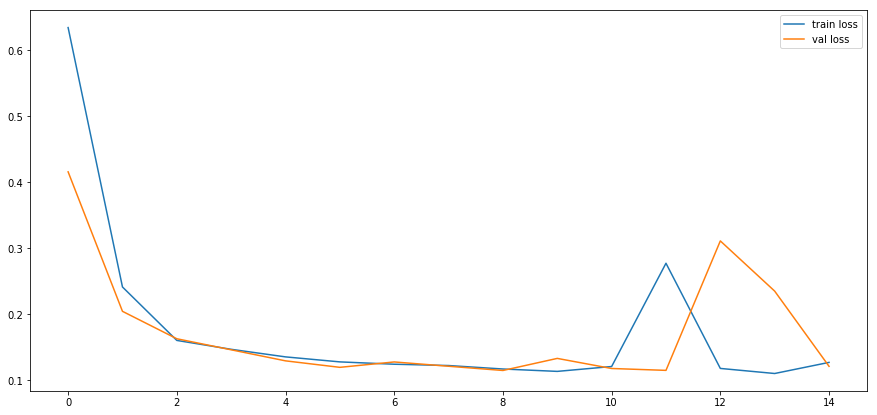

<Figure size 432x288 with 0 Axes>

In [32]:
# loss
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss.png')

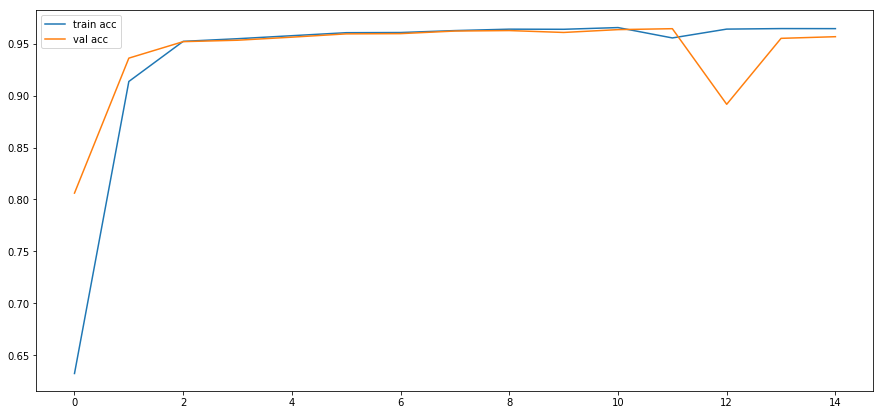

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(15,7))
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('accuracy.png')

In [34]:
img0 = tf.reshape(X_test[0], [1,60,60,3])
img0.shape

TensorShape([Dimension(1), Dimension(60), Dimension(60), Dimension(3)])

In [41]:
#Predicting one image label
predictions = model.predict(X_test)

In [42]:
predictions

array([[0.0000000e+00],
       [2.9802322e-08],
       [9.9408257e-01],
       ...,
       [7.1823597e-06],
       [3.8685757e-01],
       [0.0000000e+00]], dtype=float32)

In [43]:
from sklearn import metrics

In [44]:
clsr = metrics.confusion_matrix(y_test,predictions.round())

In [45]:
clsr

array([[2678,  119],
       [ 128, 2587]], dtype=int64)

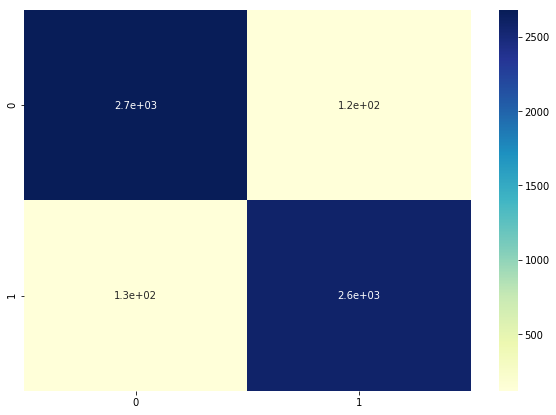

In [46]:
df_cm = pd.DataFrame(clsr, index = [i for i in "01"],  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.savefig('mat.png')